In [1]:

#Import libraries and models
import numpy as nd
import pandas as pd

import statsmodels.api as sm
import seaborn as sns
from sklearn import linear_model

import matplotlib.pyplot as plt
import folium

In [2]:
#Open File and print it
df=pd.read_csv("covid_data1.csv", index_col=0)


In [3]:
# Check if there are null values
df.isnull().values.any()


False

In [4]:
print(df)

                                   City  Total_Day_Lockdown  \
Country                                                       
France                            Paris                  56   
Belgium                        Brussels                  33   
United Kingdom                   London                  56   
Italy                             Milan                  56   
Netherlands                   Amsterdam                  44   
Hungary                        Budapest                  14   
Spain                            Madrid                  57   
Ecuador                           Quito                  16   
Algeria                         Algiers                  53   
Brazil                        Sao Paulo                  55   
Ireland                          Dublin                  67   
United States         NewYork-Manhattan                  43   
Greece                           Athens                  43   
China                             Wuhan                

In [5]:
# World Map
def covid19_world_map(df, country_names, numerical_attribute_1, numerical_attribute_2, longitude_attribute, latitude_attribute):
    
    #Return the world wide map of Covid-19 cases and deaths for the countries.
    
    world_map = folium.Map(location=[0, 0], 
                           tiles='cartodbpositron',
                           min_zoom=1, 
                           max_zoom=4, 
                           zoom_start=1)
#Set up map
    for i in range(0, len(df)):
        folium.Circle(location=[df.iloc[i][latitude_attribute], df.iloc[i][longitude_attribute]],
                      color='crimson', fill='crimson',
                      tooltip =   '<li><bold>Country : ' 
                      + str(df.iloc[i][country_names]) 
                      + '<li><bold>Confirmed Cases : '
                      + str(df.iloc[i][numerical_attribute_1])
                      + '<li><bold>Deaths : '+str(df.iloc[i][numerical_attribute_2]),
                      radius=int(df.iloc[i][numerical_attribute_1])**0.5).add_to(world_map)
    return world_map

covid19_world_map(df,'City', 'Total_Case', 'Total_Death', 'Longitude', 'Latitude')

In [8]:
df.describe() #Descriptive Analysis of the Data

,Total_Day_Lockdown,Change in Pollution,Avg_Pollution_2019,Avg_Pollution_2020,Death/cases,Total_Case,Total_Death,Country_Population,Development,Latitude,Longitude,Change
count,47.000000,47.000000,47.000000,47.000000,47.000000,4.700000e+01,47.000000,4.700000e+01,47.000000,47.000000,47.000000,47.000000
mean,41.276596,-5.555319,66.595745,61.040426,0.049956,8.251519e+04,5941.148936,1.017248e+08,0.617021,30.557918,21.323863,0.680851
std,16.553867,19.083521,45.319954,37.239219,0.046168,2.203663e+05,15064.538718,2.860954e+08,0.491369,27.445875,60.137554,0.471186
min,7.000000,-63.000000,3.000000,2.000000,0.000000,0.000000e+00,0.000000,2.722291e+06,0.000000,-40.900557,-95.712891,0.000000
25%,29.500000,-10.000000,39.000000,38.000000,0.018385,4.897500e+03,102.500000,6.369824e+06,0.000000,22.008880,-0.888173,0.000000
50%,43.000000,-6.000000,53.000000,44.000000,0.037620,1.614000e+04,497.000000,1.911621e+07,1.000000,39.399872,15.472962,1.000000
75%,55.500000,1.500000,75.000000,82.500000,0.058966,6.951650e+04,2780.000000,5.567236e+07,1.000000,49.243259,50.664792,1.000000
max,77.000000,70.000000,217.000000,175.000000,0.194144,1.467884e+06,88754.000000,1.439324e+09,1.000000,61.924110,174.885971,1.000000


In [9]:
#Find correlation between the variables
df.corr(method= "pearson") 


,Total_Day_Lockdown,Change in Pollution,Avg_Pollution_2019,Avg_Pollution_2020,Death/cases,Total_Case,Total_Death,Country_Population,Development,Latitude,Longitude,Change
Total_Day_Lockdown,1.000000,0.065878,-0.141082,-0.137936,0.167117,0.126591,0.198543,0.351530,-0.040146,-0.309405,-0.137180,-0.158449
Change in Pollution,0.065878,1.000000,-0.596232,-0.213154,0.029588,-0.042203,-0.040362,-0.440258,0.067473,-0.189848,-0.337867,-0.556612
Avg_Pollution_2019,-0.141082,-0.596232,1.000000,0.911452,-0.231878,-0.120719,-0.127902,0.496895,-0.503021,-0.003395,0.376535,0.249352
Avg_Pollution_2020,-0.137936,-0.213154,0.911452,1.000000,-0.267032,-0.168541,-0.176339,0.379105,-0.577596,-0.101420,0.285099,0.018220
Death/cases,0.167117,0.029588,-0.231878,-0.267032,1.000000,0.182682,0.452008,-0.018663,0.298662,0.285883,-0.315462,0.036685
Total_Case,0.126591,-0.042203,-0.120719,-0.168541,0.182682,1.000000,0.924813,0.177613,0.093173,0.074340,-0.306311,0.168685
Total_Death,0.198543,-0.040362,-0.127902,-0.176339,0.452008,0.924813,1.000000,0.122107,0.204068,0.119357,-0.338691,0.149215
Country_Population,0.351530,-0.440258,0.496895,0.379105,-0.018663,0.177613,0.122107,1.000000,-0.318719,-0.026824,0.202280,0.151442
Development,-0.040146,0.067473,-0.503021,-0.577596,0.298662,0.093173,0.204068,-0.318719,1.000000,0.247212,-0.105223,0.023973
Latitude,-0.309405,-0.189848,-0.003395,-0.101420,0.285883,0.074340,0.119357,-0.026824,0.247212,1.000000,0.059547,0.369780


In [40]:
#Total value of the Polution in the World in 2020
column_name="Avg_Pollution_2020"
column_sum= df["Avg_Pollution_2020"].sum()
print (column_sum)

#Total value of the Polution in the World in 2019
column_name="Avg_Pollution_2019"
column_sum= df["Avg_Pollution_2019"].sum()
print (column_sum)

#Use graph to explain it


2868.9
3130


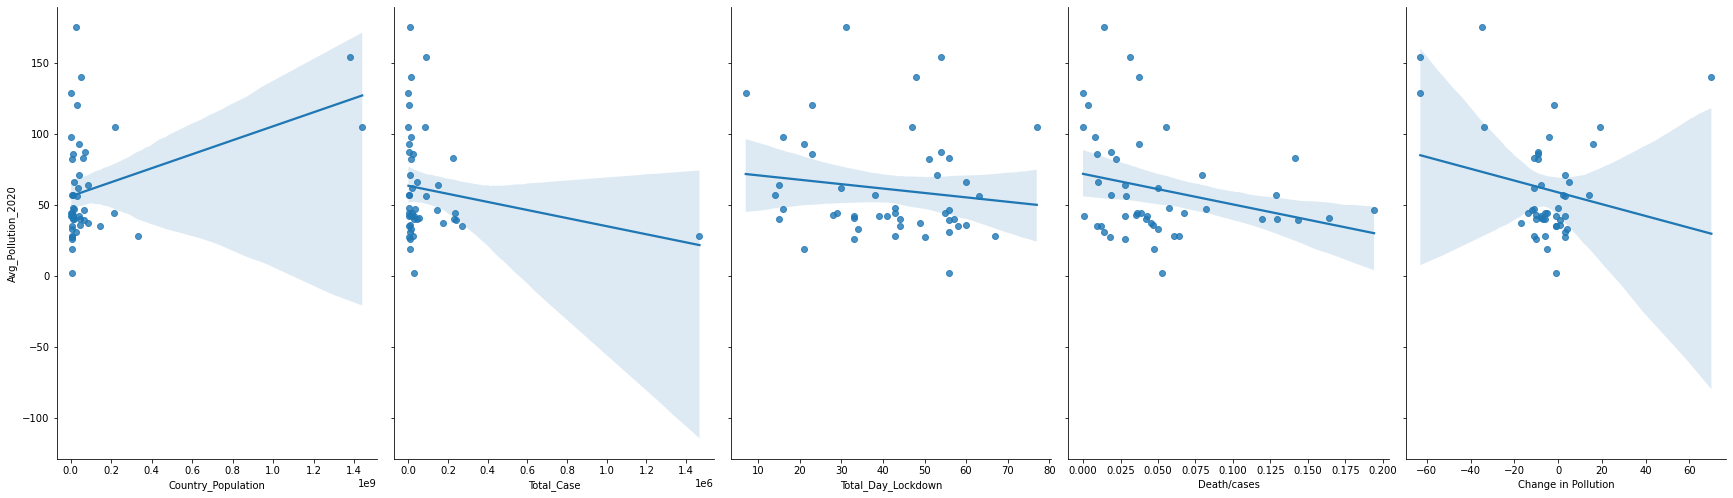

In [32]:
#Linear regression variables did anyone affected pollution?
sns.pairplot(df, x_vars=['Country_Population', 'Total_Case', 'Total_Day_Lockdown', 'Death/cases', 'Change in Pollution'], y_vars='Avg_Pollution_2020', height=7, aspect=0.7, kind='reg')

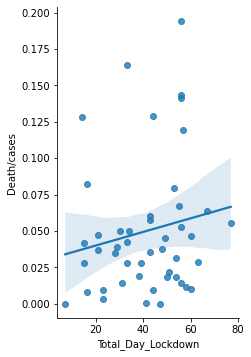

In [34]:
#How death/cases affected the use of lockdowns
sns.pairplot(df, x_vars=['Total_Day_Lockdown'], y_vars='Death/cases',height=5, aspect=0.7, kind='reg')

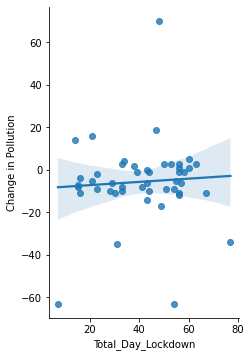

In [33]:
#Linear regression graph Lockdown affecting the change in pollution 
sns.pairplot(df, x_vars=['Total_Day_Lockdown'], y_vars='Change in Pollution', height=5, aspect=0.7, kind='reg')

In [24]:
#Linear Regression Model 
#Understand if the days of lockedown and the mortality rate influence pollution
reg = linear_model.LinearRegression()
reg.fit(df[['Total_Day_Lockdown','Death/cases']], df.Avg_Pollution_2020)

LinearRegression()

In [25]:
reg.coef_

array([  -0.21593949, -202.45104437])

In [27]:
reg.intercept_

80.06732128754791